In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


def analytical_magnetization_ising_chain(beta, H, J):
    return np.sinh(beta * H) / np.sqrt(np.cosh(beta * H) ** 2 - 2 * np.exp(-2 * beta * J) * np.sinh(2 * beta * J))

def generate_new_state(state, num_spins):
    new_state = state
    spin_id = np.random.choice(num_spins)
    new_state[spin_id] = - new_state[spin_id]
    return new_state

def calculate_ising_chain_energy(state, num_spins, J, H):
    energy = 0
    for nspin in range(num_spins - 1):
        energy += - J * state[nspin] * state[nspin + 1]
        energy += - H * state[nspin]
    energy += - H * state[num_spins - 1]
    return energy

def calculate_magnetization(state):
    return np.mean(state)
    
def run_metropolis_ising_chain(num_spins=10, beta=1, J=1, H=1, num_steps=100, num_bins=10):
    state = 2 * np.random.randint(2, size=num_spins) - 1
    magnetization = []#np.zeros(num_bins * num_steps)
    
    for nbin in range(num_bins):
        for nstep in range(num_steps):
            energy = calculate_ising_chain_energy(state, num_spins, J, H)
            new_state = generate_new_state(np.copy(state), num_spins)
            new_energy = calculate_ising_chain_energy(new_state, num_spins, J, H)

            probability = min(1, np.exp(beta * (energy - new_energy)))

            if np.random.random() < probability:
                state = new_state
 
            magnetization.append(calculate_magnetization(state))
                
    return magnetization                               

In [2]:
beta = np.arange(10) * 0.1
magnet = []

for nbeta in tqdm(beta):
    magnetization = run_metropolis_ising_chain(num_spins=100, beta=nbeta, J=1, H=1, num_steps=100, num_bins=100)
    magnet.append(np.mean(magnetization[5000:]))

analytical_mag = analytical_magnetization_ising_chain(beta, H=1, J=1)

100%|██████████| 10/10 [00:27<00:00,  2.74s/it]


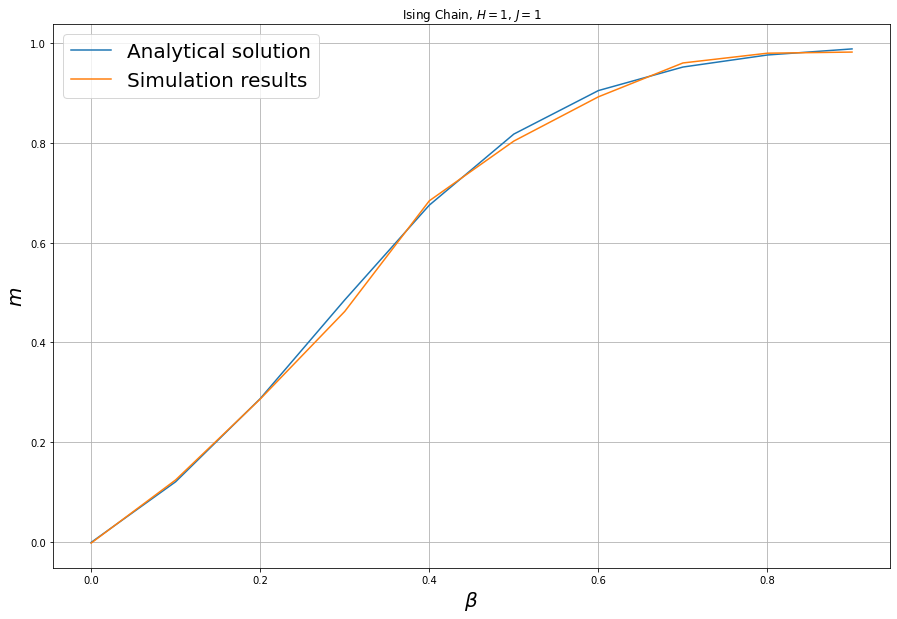

In [3]:
plot, fig = plt.subplots(nrows=1, ncols=1)
plot.set_figheight(10)
plot.set_figwidth(15)
plt.plot(beta, analytical_mag, label='Analytical solution')
plt.plot(beta, magnet, label='Simulation results')
plt.xlabel(r'$\beta$',fontsize=20)
plt.ylabel(r'$m$',fontsize=20)
plt.title(r'Ising Chain, $H=1$, $J=1$')
plt.legend(fontsize=20)
plt.grid()
# plt.show()
# plt.savefig('Ising_chain.pdf')